<a href="https://colab.research.google.com/github/Thujaina/AI-programs/blob/main/ecgnit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow scikeras imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is in

In [3]:
from google.colab import files

uploaded = files.upload()


Saving mitbih_test.csv to mitbih_test.csv
Saving mitbih_train.csv to mitbih_train.csv


        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

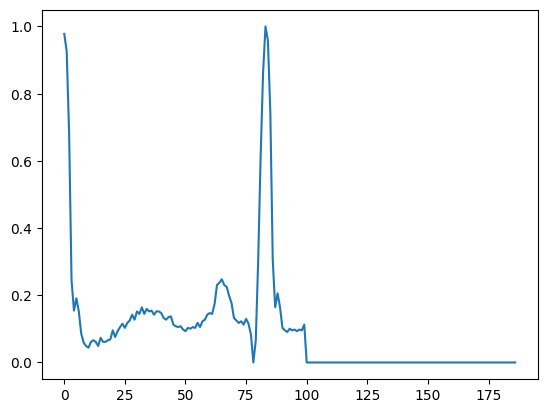

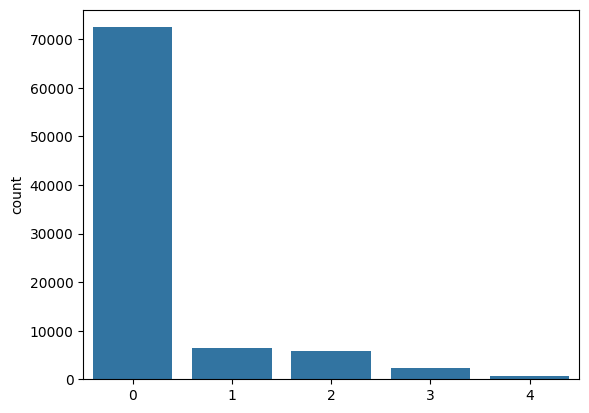

In [ ]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# deep learning libraries:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Importing the data
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

# 1. Data Preprocessing:
print(train.head())
print(test.head())
print(train.shape)
print(test.shape)

# Visualize the first row after excluding the last column (Class):
plt.plot(train.iloc[0, train.columns != 187])
plt.show()

# observing the number of subject per class:
train.iloc[:, -1].value_counts()
# Visualize the number of subjects in each class in the train dataset:
classes = [0, 1, 2, 3, 4]
sns.barplot(x=classes, y=train.iloc[:, -1].value_counts())
plt.show()

# checking missing values:
train.isna().sum()
test.isna().sum()

# Splitting the data:
# creating X and y from train dataset:
X_train = train.loc[:,train.columns !=187]
y_train = train.loc[: , train.columns == 187]

# data balancing:
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X_train, y_train)

sns.barplot(x=classes, y=y_res.value_counts())
plt.show()

# creating Validation set from train set:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=0)
# creating X and y from test dataset:
X_test = test.loc[:, train.columns != 187]
y_test = test.loc[:, train.columns == 187]

# 2. Building a model:
def ann_model():
    model = Sequential()
    model.add(Dense(50, input_shape=(187,), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = ann_model()
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

# Training and validation Accuracy:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Test accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

# Training and validation Loss:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

# 3. Model predictions and evaluation:
# prediction for ANN model:
model_predictions = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Model Accuracy is {test_acc}')
print(f'Model Loss is {test_loss}')

# Classification report:
print(classification_report(y_true=y_test, y_pred=np.argmax(model_predictions, axis=1)))
# Confusion Matrix:
cm = confusion_matrix(y_true=y_test, y_pred=np.argmax(model_predictions, axis=1))
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4. Cross Validation:
results = []
estimator = KerasClassifier(build_fn=ann_model, epochs=20, batch_size=64)
kfold = KFold(n_splits=4)
results.append(cross_val_score(estimator,X_train, y_train, cv=kfold))

cv_results = pd.DataFrame(results)
cv_index = ['ANN']
cv_results['Model'] = cv_index
cv_results.set_index('Model', inplace=True)
cv_results['Mean'] = cv_results.mean(axis=1)
cv_results